## 용어
- 앙상블(ensemble): 여러 모델의 집합을 이용해서 하나의 예측을 이끌어내는 방식
- 배깅(bagging): 데이터를 부트스트래핑해서 여러 모델을 만드는 일반적인 방법
- 랜덤 포레스트(random forest): 의사 결정 트리 모델에 기반을 둔 배깅 추정 모델
- 변수 중요도(variable importance): 모델 성능에 미치는 예측 변수의 중요도

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [17]:
loan3000 = pd.read_csv('../../data/loan3000.csv', index_col=0)

In [18]:
loan3000

,outcome,purpose_,dti,borrower_score,payment_inc_ratio
32109,paid off,debt_consolidation,21.23,0.40,5.11135
16982,default,credit_card,15.49,0.40,5.43165
25335,paid off,debt_consolidation,27.30,0.70,9.23003
34580,paid off,major_purchase,21.11,0.40,2.33482
14424,default,debt_consolidation,16.46,0.45,12.10320
...,...,...,...,...,...
36589,paid off,debt_consolidation,13.30,0.50,18.36620
43889,paid off,other,6.09,0.60,1.80421
7219,default,debt_consolidation,16.13,0.20,15.42180
8987,default,debt_consolidation,18.39,0.45,8.92335


## 랜덤 포레스트
- 레코드를 표본 추출할때, 변수 역시 샘플링한다
- 알고리즘의 각 단계마다, 고를 수 있는 변수가 랜덤하게 결정된 전체 변수들의 부분집합에 한정된다.
- 보통 전체 변수의 개수가 P일때 root(P)개 정도의 변수를 샘플링

In [20]:
features = ['borrower_score', 'payment_inc_ratio']
label = 'outcome'

X = loan3000[features]
y = loan3000[label]

rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                           oob_score=True) # OOB(out-of-bag) 추정 에러는 트리 모델을 만들 때 사용했던 학습 데이터에 속하지 않는 데이터를 사용해 구한, 학습된 모델의 오차율을 말한다
rf.fit(X, y)
print(rf.oob_decision_function_)

[[0.18131868 0.81868132]
 [0.26704545 0.73295455]
 [0.93333333 0.06666667]
 ...
 [1.         0.        ]
 [0.73157895 0.26842105]
 [0.68085106 0.31914894]]


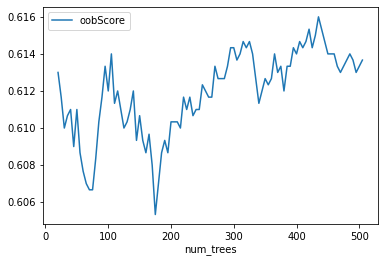

In [25]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)
    
pd.DataFrame({
    'num_trees': n_estimator, 
    'oobScore': oobScores
}).plot(x='num_trees', y='oobScore')

plt.show()